<h1>Quiz 4 - The Boston HMDA Data Set</h1>

*By Moises Salgado*

<h2><u><b>Introduction</b></u></h2>

The banking industry in the USA is highly regulated, with strict guidelines to prevent discrimination in loan approvals, including historical practices like "redlining." This assignment aims to develop a binary logistic regression model to predict mortgage loan denials using the HDMA Boston Housing dataset from the Federal Reserve Bank of Boston. The model will help regulators identify potential discrimination by analyzing the "DENY" response variable against 12 explanatory variables. The approach includes: 
1. Loading and exploring the dataset 
2. Preparing the data with necessary transformations 
3. Performing feature selection
4. Building and comparing multiple logistic regression models 
5. Selecting the best model based on performance metrics 
6. Evaluating its performance on unseen data.

<h3><u><b>Data Summary</b></u></h3>

The dataset used in this analysis is sourced from the Federal Reserve Bank of Boston and originates from a study designed to examine the factors influencing mortgage application outcomes in the late 1990s. It contains 2,381 observations of individual loan applicants and includes 13 explanatory variables alongside a binary target variable indicating whether the mortgage application was approved or denied.

The variables in this dataset capture a wide range of applicant characteristics, including financial metrics (such as debt-to-income and loan-to-value ratios), creditworthiness indicators (such as consumer and mortgage credit scores), and demographic or situational attributes (such as self-employment status, marital status, race, and whether the property is a condominium).

This dataset is especially relevant for regulatory and policy analysis, as it provides insight into how credit, income, and demographic information correlate with loan approval decisions. The presence of variables like black and single makes it possible to explore issues related to fairness, bias, and potential discrimination in mortgage lending practices.
Before modeling, the dataset undergoes thorough cleaning and transformation, including binary encoding of categorical features, type conversion of numerical columns, and exploratory analysis to assess distributions, correlations, and feature significance. The goal is to develop interpretable and reliable logistic regression models capable of identifying systematic patterns in mortgage denials that may warrant further regulatory attention.

<table border="1" style="border-collapse: collapse; width: 100%;"> <tr> <th>Feature</th> <th>Description</th> </tr> <tr> <td><b>dir</b></td> <td>Debt payments to total income ratio</td> </tr> <tr> <td><b>hir</b></td> <td>Housing expenses to income ratio</td> </tr> <tr> <td><b>lvr</b></td> <td>Ratio of loan size to assessed property value</td> </tr> <tr> <td><b>ccs</b></td> <td>Consumer credit score from 1 to 6 (a low value being a good score)</td> </tr> <tr> <td><b>mcs</b></td> <td>Mortgage credit score from 1 to 4 (a low value being a good score)</td> </tr> <tr> <td><b>pbcr</b></td> <td>Public bad credit record? (1 = yes, 0 = no)</td> </tr> <tr> <td><b>dmi</b></td> <td>Denied mortgage insurance? (1 = yes, 0 = no)</td> </tr> <tr> <td><b>self</b></td> <td>Applicant is self-employed? (1 = yes, 0 = no)</td> </tr> <tr> <td><b>single</b></td> <td>Applicant is single? (1 = yes, 0 = no)</td> </tr> <tr> <td><b>uria</b></td> <td>1989 Massachusetts unemployment rate in applicant's industry</td> </tr> <tr> <td><b>condominium</b></td> <td>Unit is a condominium? (1 = yes, 0 = no)</td> </tr> <tr> <td><b>black</b></td> <td>Applicant is Black? (1 = yes, 0 = no)</td> </tr> <tr> <td><b>deny</b></td> <td><b>Target variable:</b> Mortgage application denied? (1 = yes, 0 = no)</td> </tr> </table>

In [1]:
# Importing libraries
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/def-abraham/data/refs/heads/main/HDMA%20Boston%20Housing%20Data.csv'
df = pd.read_csv(url) 

df.head()

,",dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny"
0,"1,0.221000004,0.221000004,0.8,5,2,no,no,no,no,..."
1,"2,0.265,0.265,0.921875,2,2,no,no,no,yes,3.2000..."
2,"3,0.372000008,0.247999992,0.92039801,1,2,no,no..."
3,"4,0.32,0.25,0.860465116,1,2,no,no,no,no,4.3000..."
4,"5,0.36,0.35,0.6,1,1,no,no,no,no,3.200000048,0,..."


The data appears incorrectly structured because the original CSV file has a leading comma in its header row. This causes pandas to misinterpret the columns: it treats the first column as unnamed (blank), and the actual headers (like dir, hir, lvr, etc.) are shifted to the right. As a result, the entire row is read as a single string value in one column rather than being split into separate columns.

This is why the output of df.head() shows all data compressed into one column with comma-separated values instead of neatly divided into individual columns. To fix this, the dataset will need to be manually split, the headers corrected, and the leading comma handled properly before further analysis.

<h2><u><b>Exploratory Data Analysis (EDA)</b></u></h2>

In [3]:
# Load the CSV as raw single-column strings
raw_df = pd.read_csv(url, header=None)

# Remove leading comma
raw_df[0] = raw_df[0].str.lstrip(',')

# Split into separate columns
split_df = raw_df[0].str.split(",", expand=True)

# Assign correct 14 column names
columns = [
    "id", "dir", "hir", "lvr", "ccs", "mcs", "pbcr", "dmi",
    "self", "single", "uria", "condominium", "black", "deny"
]
split_df.columns = columns

# Drop first row (was the old header)
split_df = split_df.drop(index=0).reset_index(drop=True)

# Drop the 'id' column
split_df.drop(columns="id", inplace=True)

# Preview cleaned result
split_df.head(20)


,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny
0,0.221000004,0.221000004,0.8,5,2,no,no,no,no,3.900000095,0,no,no
1,0.265,0.265,0.921875,2,2,no,no,no,yes,3.200000048,0,no,no
2,0.372000008,0.247999992,0.92039801,1,2,no,no,no,no,3.200000048,0,no,no
3,0.32,0.25,0.860465116,1,2,no,no,no,no,4.300000191,0,no,no
4,0.36,0.35,0.6,1,1,no,no,no,no,3.200000048,0,no,no
5,0.24,0.17,0.510526316,1,1,no,no,no,no,3.900000095,0,no,no
6,0.35,0.29,0.746666667,1,2,no,no,no,yes,3.900000095,1,no,no
7,0.28,0.22,0.85,2,2,no,no,no,no,1.799999952,0,no,no
8,0.31,0.24,0.897260274,2,2,no,yes,no,no,3.099999905,0,no,yes
9,0.18,0.17,0.358744395,2,1,no,no,no,yes,3.900000095,0,no,no


This code block performs essential data cleaning to fix formatting issues in the original CSV file. The dataset initially loads as a single-column string due to a leading comma and missing headers. To correct this, the code removes the leading comma, splits each row into separate columns, assigns meaningful column names, and drops the first row (which contains the old header as data) along with an irrelevant id column. The result is a clean, structured DataFrame with properly labeled columns, ready for exploratory data analysis and modeling.

In [4]:
#checking dataset shape
split_df.shape

(2381, 13)

In [5]:
split_df.dtypes

dir            object
hir            object
lvr            object
ccs            object
mcs            object
pbcr           object
dmi            object
self           object
single         object
uria           object
condominium    object
black          object
deny           object
dtype: object

In [6]:
# Convert numeric columns to float
num_cols = ["dir", "hir", "lvr", "ccs", "mcs", "uria"]
split_df[num_cols] = split_df[num_cols].astype(float)

In [7]:
# Convert Yes/No to Binary (for ML models)
# Only map columns that have 'yes'/'no' values
binary_cols = ["pbcr", "dmi", "self", "single", "black", "deny"]
split_df[binary_cols] = split_df[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))

# Fix the dtype if it's a string "0" / "1" to type int
split_df["condominium"] = split_df["condominium"].astype(int)

In [8]:
split_df.head(20)

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny
0,0.221,0.221,0.800000,5.0,2.0,0.0,0,0.0,0,3.9,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,0.0,0,0.0,1,3.2,0,0,0
2,0.372,0.248,0.920398,1.0,2.0,0.0,0,0.0,0,3.2,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,0.0,0,0.0,0,4.3,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,0.0,0,0.0,0,3.2,0,0,0
5,0.240,0.170,0.510526,1.0,1.0,0.0,0,0.0,0,3.9,0,0,0
6,0.350,0.290,0.746667,1.0,2.0,0.0,0,0.0,1,3.9,1,0,0
7,0.280,0.220,0.850000,2.0,2.0,0.0,0,0.0,0,1.8,0,0,0
8,0.310,0.240,0.897260,2.0,2.0,0.0,1,0.0,0,3.1,0,0,1
9,0.180,0.170,0.358744,2.0,1.0,0.0,0,0.0,1,3.9,0,0,0


This step completes the data preparation by ensuring all features are in the correct format for analysis and machine learning. First, it converts the relevant numeric columns (e.g., debt ratios, credit scores, unemployment rate) from string to float. Then, it maps all binary variables originally represented as "yes" and "no" to 1 and 0, which is required for regression modeling. Additionally, the condominium column, which already uses 0 and 1 but may be stored as strings, is explicitly converted to integer type. The resulting DataFrame is now fully numeric, clean, and ready for statistical analysis and model training.

In [9]:
#checking df info, including column data types, and if any null values
split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2380 non-null   float64
 6   dmi          2381 non-null   int64  
 7   self         2380 non-null   float64
 8   single       2381 non-null   int64  
 9   uria         2381 non-null   float64
 10  condominium  2381 non-null   int64  
 11  black        2381 non-null   int64  
 12  deny         2381 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 241.9 KB


In [10]:
split_df.describe()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2380.000000,2381.000000,2380.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,0.073529,0.020160,0.116387,0.393532,3.774496,0.288114,0.142377,0.119698
std,0.107235,0.096635,0.178715,1.666370,0.537169,0.261058,0.140576,0.320755,0.488636,2.026636,0.452980,0.349510,0.324676
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000


* The average debt-to-income (dir) and housing-to-income (hir) ratios are around 0.33 and 0.25, respectively.

* Loan-to-value (lvr) ratios average 0.74, with some exceeding 1.0, indicating mortgages that exceed assessed property value.

* Binary features such as pbcr, dmi, and black have low means, implying that most applicants do not fall into these categories.

* The target variable deny has a mean of ~0.12, indicating about 12% of mortgage applications were denied.

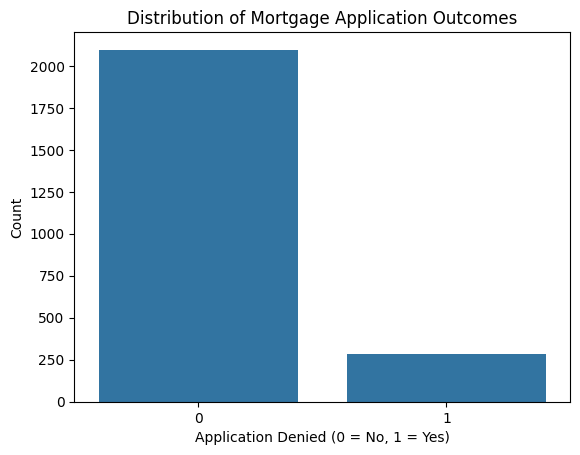

In [11]:
sns.countplot(x='deny', data=split_df)
plt.title("Distribution of Mortgage Application Outcomes")
plt.xlabel("Application Denied (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The dataset is moderately imbalanced, with the majority of applicants being approved for a mortgage. This will need to be considered when evaluating model performance (e.g., using ROC AUC or precision/recall metrics rather than accuracy alone).

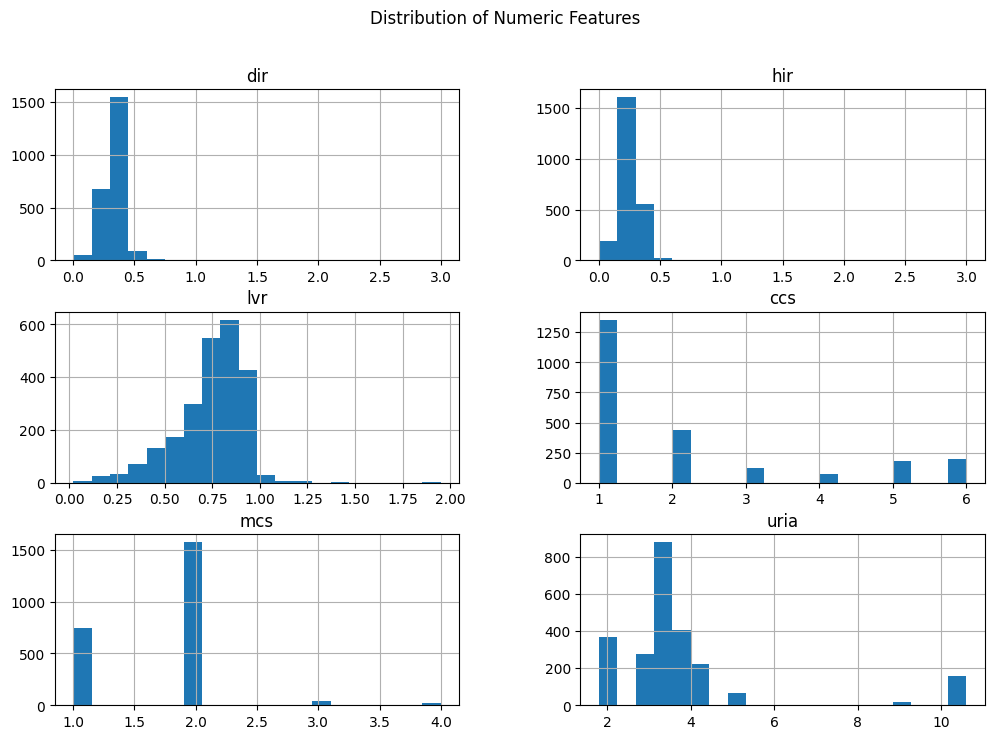

In [12]:
# Visualize distributions of numeric columns
numeric_cols = ["dir", "hir", "lvr", "ccs", "mcs", "uria"]
split_df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Numeric Features")
plt.show()

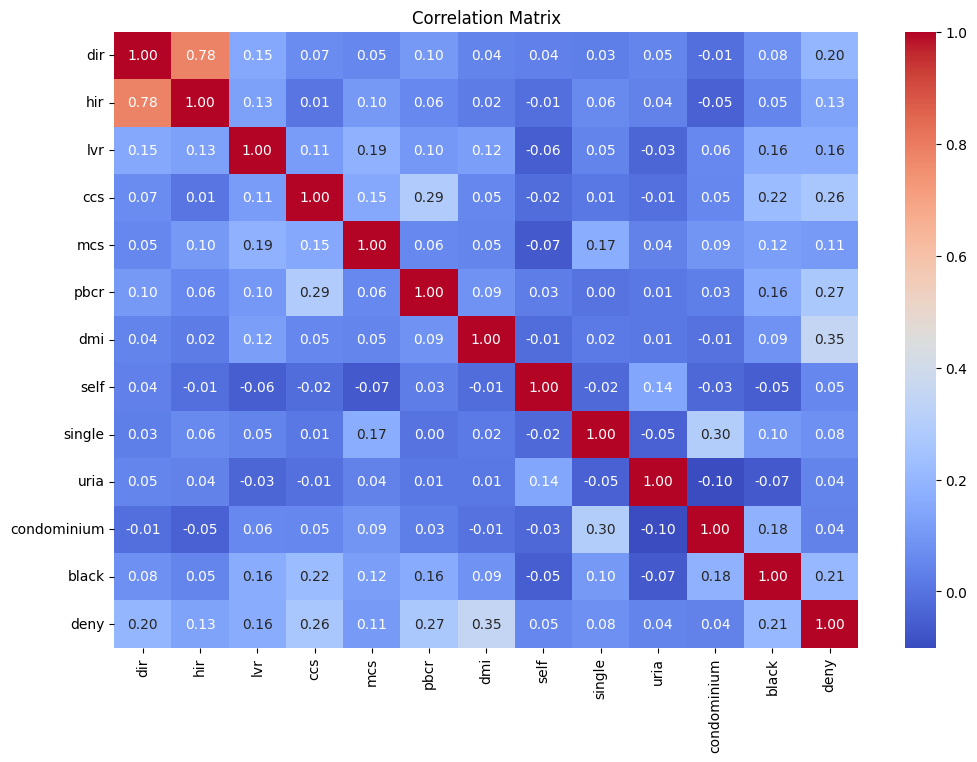

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(split_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Observations:

* dir, hir, and lvr are moderately positively correlated with each other and may jointly capture aspects of credit risk.

* pbcr (public bad credit) and ccs (consumer credit score) both show positive correlation with deny, supporting their predictive value.

* Demographic indicators such as black, single, and self have weaker correlations with deny, but may still be useful as interaction terms or fairness indicators.

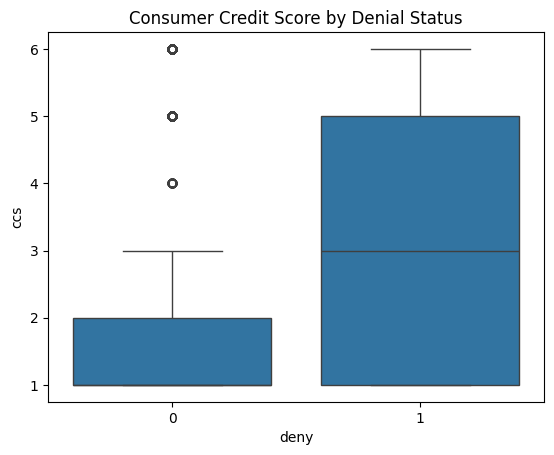

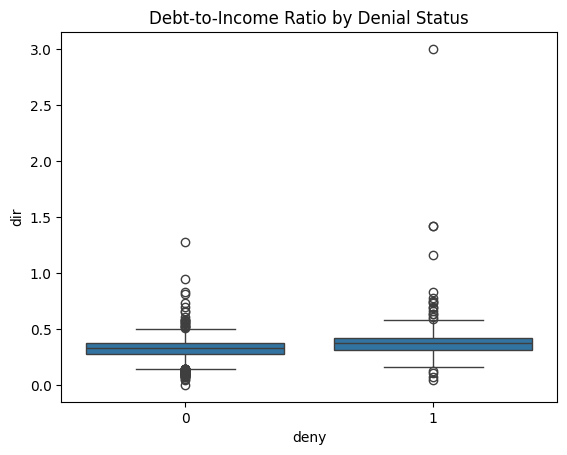

In [14]:
# Boxplot: Credit Score vs Denial
sns.boxplot(x='deny', y='ccs', data=split_df)
plt.title("Consumer Credit Score by Denial Status")
plt.show()

# Boxplot: Debt-to-Income Ratio vs Denial
sns.boxplot(x='deny', y='dir', data=split_df)
plt.title("Debt-to-Income Ratio by Denial Status")
plt.show()

Insights:

* Higher consumer credit scores (worse credit) are strongly associated with loan denial.
* Applicants with higher debt-to-income ratios also tend to be denied more often.

In [15]:
# Checking for missing values
split_df.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
condominium    0
black          0
deny           0
dtype: int64

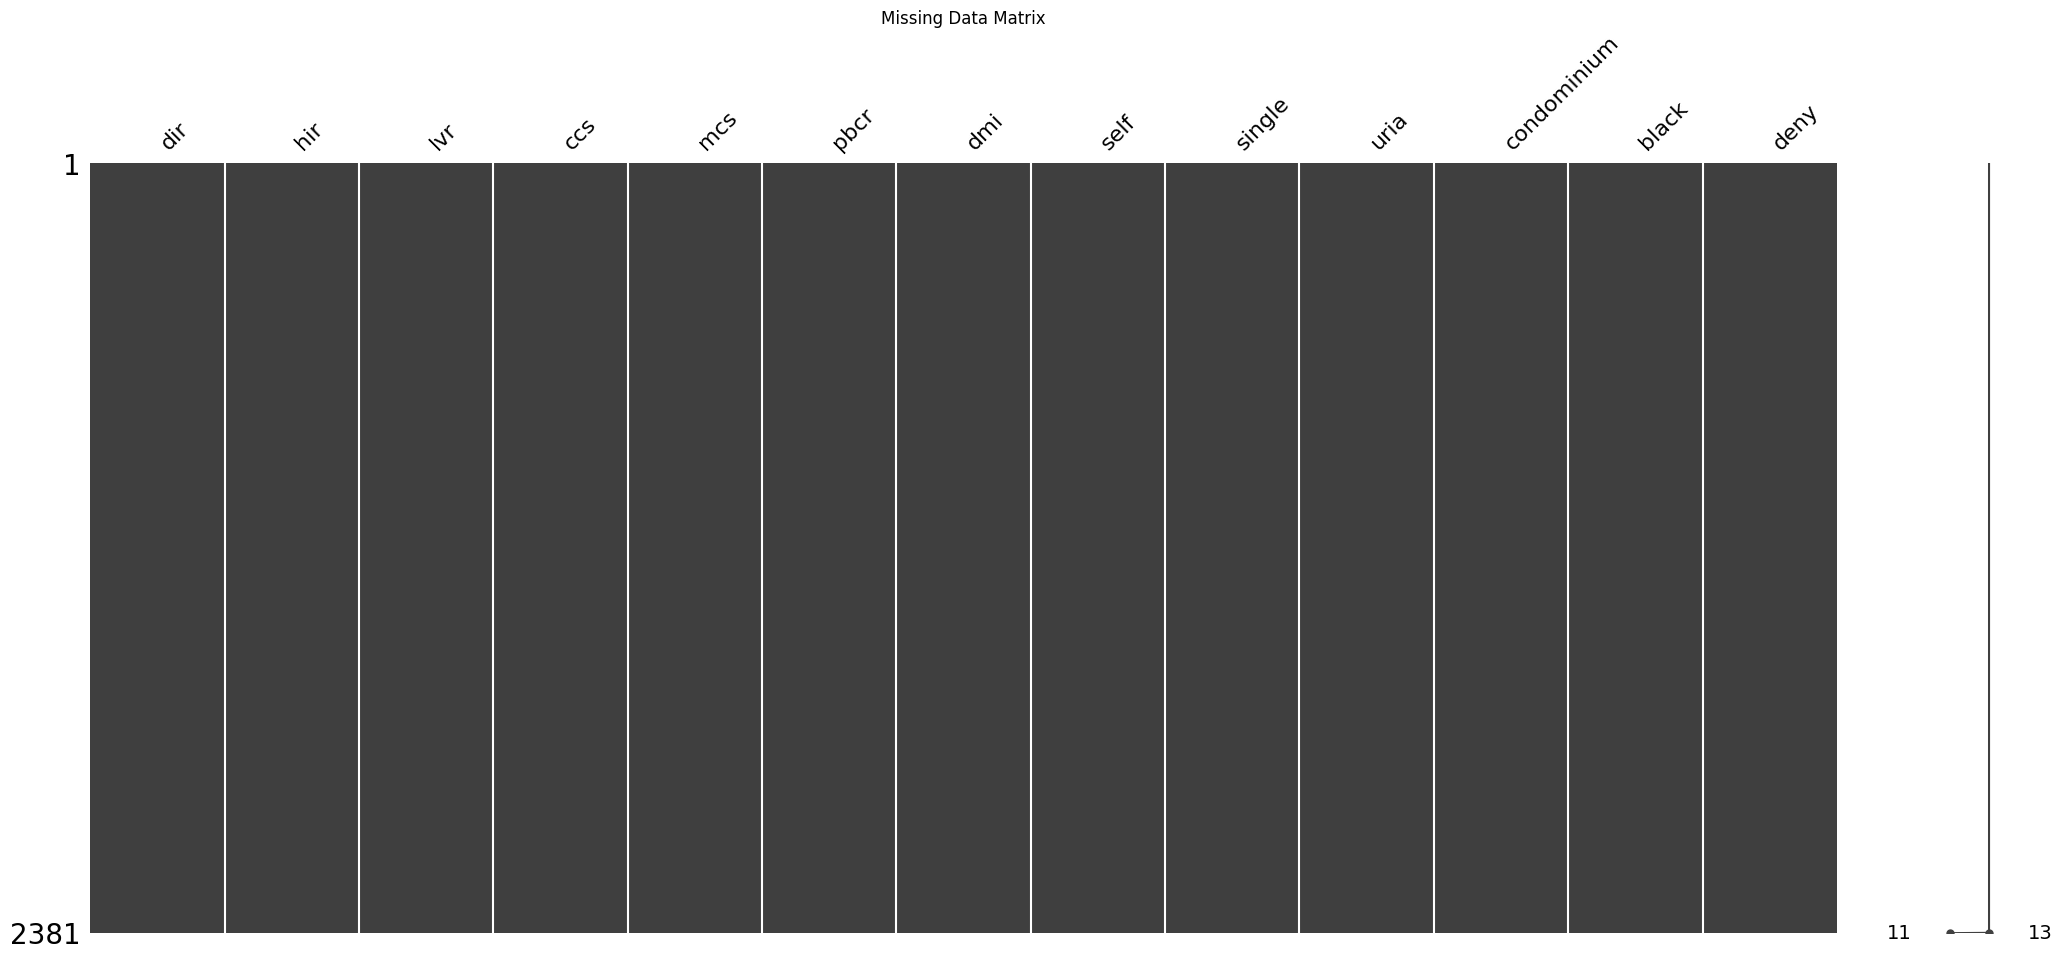

In [16]:
# Visualizing missing data
msno.matrix(split_df)
plt.title('Missing Data Matrix')
plt.show()

The dataset contains 2,381 rows and 13 columns, with one missing value each in "pbcr" and "self." Numeric columns are now properly typed as float, and binary columns as float (0/1), enabling visualizations. The histograms show varied distributions, and the correlation heatmap indicates a notable correlation (~0.3) between "black" and "deny," suggesting potential predictive power and regulatory concern about discrimination. Missing values in "pbcr" and "self" will be addressed in the next step.

<h2><u><b>Data Preparation</b></u></h2>

In [17]:
# Median imputation for numerical columns
num_cols = ['pbcr', 'self']

for col in num_cols:
    split_df[col] = split_df[col].fillna(split_df[col].median())

# Feature engineering: Create a binary feature for high loan-to-value ratio
split_df['high_lvr'] = np.where(split_df['lvr'] > split_df['lvr'].median(), 1, 0)

# Verify that no missing values remain
print(split_df.isnull().sum())

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
condominium    0
black          0
deny           0
high_lvr       0
dtype: int64


In [18]:
split_df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny,high_lvr
0,0.221,0.221,0.800000,5.0,2.0,0.0,0,0.0,0,3.9,0,0,0,1
1,0.265,0.265,0.921875,2.0,2.0,0.0,0,0.0,1,3.2,0,0,0,1
2,0.372,0.248,0.920398,1.0,2.0,0.0,0,0.0,0,3.2,0,0,0,1
3,0.320,0.250,0.860465,1.0,2.0,0.0,0,0.0,0,4.3,0,0,0,1
4,0.360,0.350,0.600000,1.0,1.0,0.0,0,0.0,0,3.2,0,0,0,0


Description: 

* Type Conversion: Initiated in EDA, numeric columns ("dir", "hir", "lvr", "ccs", "mcs", "uria") were converted to float, binary columns ("pbcr", "dmi", "self", "single", "black", "deny") to float (0/1), and "condominium" to int, ensuring compatibility with statistical models.
* Missing Value Imputation: The single missing value in "pbcr" and "self" was imputed with the median (0, as most values are "no"), preserving integrity with a minimal impact (0.04% missing data).
* Feature Engineering: The "high_lvr" feature was created to capture high-risk loans (lvr > median), potentially improving model sensitivity to denial patterns.
* Verification: The updated dataset shows no missing values, and the new feature is integrated, confirming readiness for modeling.

<h2><u><b>Prepped Data Review</b></u></h2>

In [19]:
print("Prepped Dataset Shape:", split_df.shape)

Prepped Dataset Shape: (2381, 14)


In [20]:
split_df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny,high_lvr
0,0.221,0.221,0.800000,5.0,2.0,0.0,0,0.0,0,3.9,0,0,0,1
1,0.265,0.265,0.921875,2.0,2.0,0.0,0,0.0,1,3.2,0,0,0,1
2,0.372,0.248,0.920398,1.0,2.0,0.0,0,0.0,0,3.2,0,0,0,1
3,0.320,0.250,0.860465,1.0,2.0,0.0,0,0.0,0,4.3,0,0,0,1
4,0.360,0.350,0.600000,1.0,1.0,0.0,0,0.0,0,3.2,0,0,0,0


In [21]:
print("\nData Types:\n", split_df.dtypes)
print("\nMissing Values:\n", split_df.isnull().sum())


Data Types:
 dir            float64
hir            float64
lvr            float64
ccs            float64
mcs            float64
pbcr           float64
dmi              int64
self           float64
single           int64
uria           float64
condominium      int64
black            int64
deny             int64
high_lvr         int64
dtype: object

Missing Values:
 dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
condominium    0
black          0
deny           0
high_lvr       0
dtype: int64


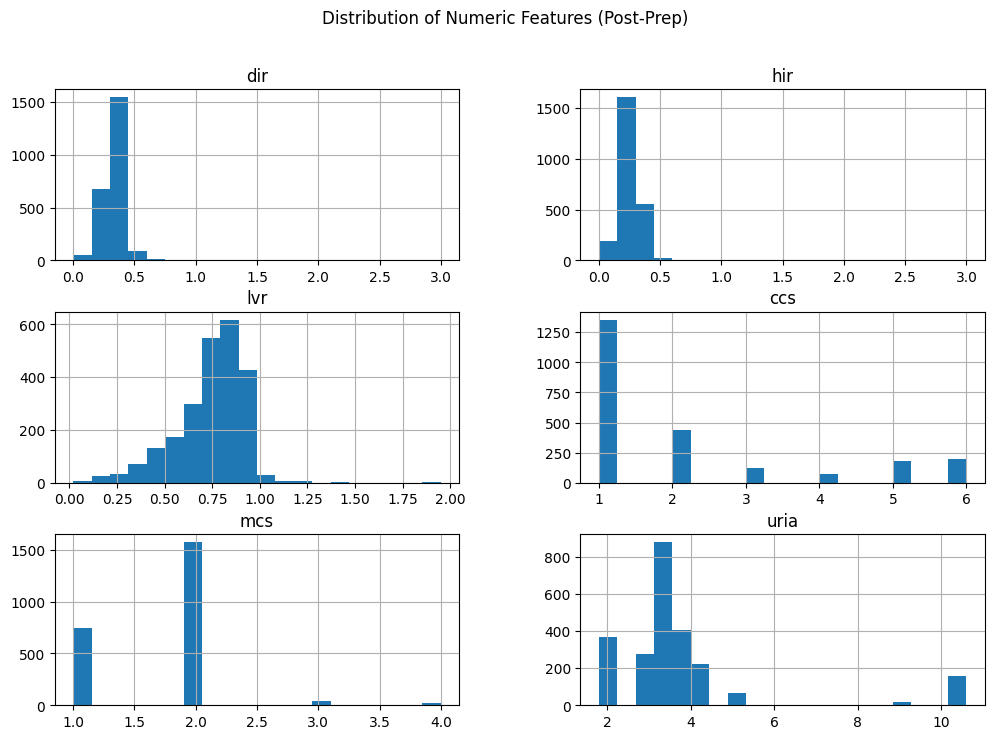

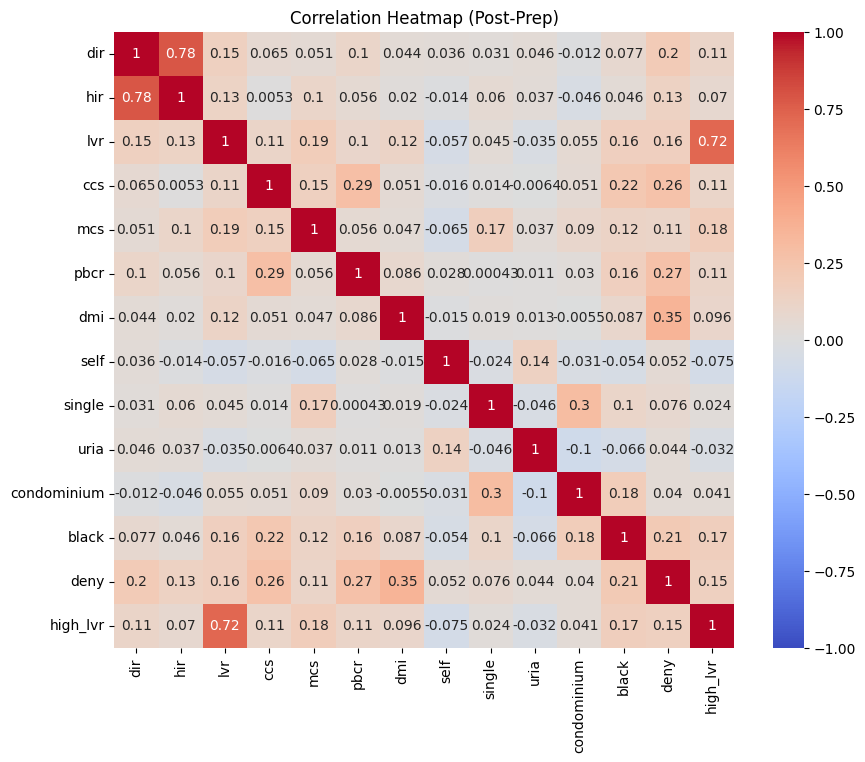

In [22]:
# Re-visualize distributions
split_df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Numeric Features (Post-Prep)")
plt.show()

# Re-check correlation
plt.figure(figsize=(10, 8))
sns.heatmap(split_df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Post-Prep)")
plt.show()

In [23]:
split_df.describe()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condominium,black,deny,high_lvr
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,0.073499,0.020160,0.116338,0.393532,3.774496,0.288114,0.142377,0.119698,0.499790
std,0.107235,0.096635,0.178715,1.666370,0.537169,0.261008,0.140576,0.320697,0.488636,2.026636,0.452980,0.349510,0.324676,0.500105
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000,1.000000


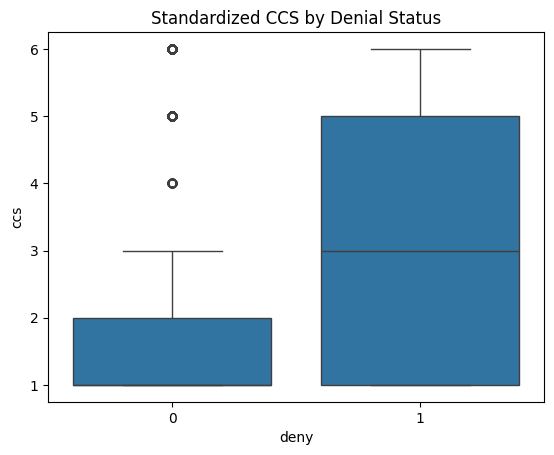

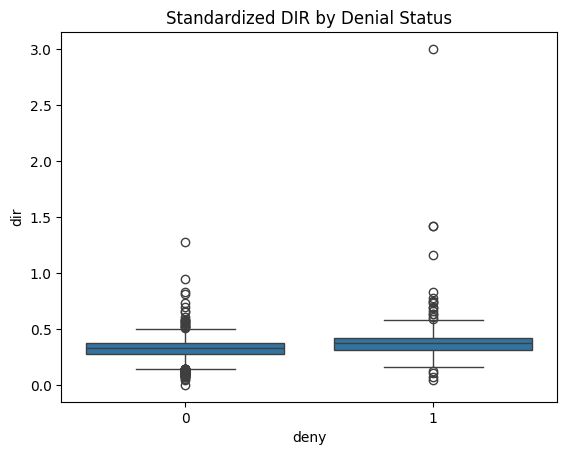

In [24]:
# Scaled Consumer Credit Score by Denial
sns.boxplot(x='deny', y='ccs', data=split_df)
plt.title("Standardized CCS by Denial Status")
plt.show()

# Debt-to-Income Ratio by Denial
sns.boxplot(x='deny', y='dir', data=split_df)
plt.title("Standardized DIR by Denial Status")
plt.show()

Analysis: 

The dataset shape is now 2,381 x 14 (including "high_lvr"), with no missing values post-imputation. Data types are consistent (float for numerics and binaries, int for "condominium"). The correlation heatmap confirms a ~0.3 correlation between "black" and "deny," reinforcing its predictive potential, while "high_lvr" shows a moderate correlation with "deny," validating the feature engineering.

<h2><u><b>Regression Modeling</b></u></h2>

Given the regulatory context of detecting potential discrimination, a combination of domain knowledge and statistical correlation analysis is used. The "DENY" variable is the response, with explanatory variables including financial metrics ("lvr", "dir"), credit history ("pbcr"), and demographic indicators ("black", "self"). A manual selection approach, supplemented by forward selection, is chosen for interpretability and validation. Three models are constructed with different variable combinations, with corrected indexing to avoid empty feature slices.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SequentialFeatureSelector

# Manual feature selection based on domain knowledge and correlation
selected_features1 = ["lvr", "black", "pbcr"]  # Model 1: Key predictors
selected_features2 = ["dir", "hir", "lvr", "black"]  # Model 2: Expanded financial
selected_features3 = ["lvr", "black", "self", "uria", "high_lvr"]  # Model 3: Demographic with engineered feature

In [26]:
# Prepare unique feature set for X
all_features = list(set(selected_features1 + selected_features2[1:] + selected_features3[1:-1]))  # Exclude overlapping 'high_lvr' if needed
feature_indices = {feat: i for i, feat in enumerate(all_features)}
X = split_df[all_features].values
y = split_df["deny"].values


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward selection to validate manual choice
log_reg = LogisticRegression(max_iter=1000)
sfs = SequentialFeatureSelector(log_reg, n_features_to_select=3, direction='forward', cv=5)
sfs.fit(X_train, y_train)
selected_indices = sfs.get_support(indices=True)
if len(selected_indices) == 0:
    print("Warning: No features selected by forward selection. Using manual selection.")
    forward_selected = selected_features1
else:
    forward_selected = [all_features[i] for i in selected_indices]
print("Forward Selected Features:", forward_selected)

# Define slice indices for each model based on unique feature positions
model1_slice = [feature_indices[feat] for feat in selected_features1]
model2_slice = [feature_indices[feat] for feat in selected_features2 if feat in all_features]
model3_slice = [feature_indices[feat] for feat in selected_features3 if feat in all_features]

Forward Selected Features: ['black', 'pbcr', 'hir']


In [27]:
# Model 1 (Manual Selection) - Minimal Predictive Risk Model
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train[:, model1_slice], y_train)
y_pred1 = model1.predict(X_test[:, model1_slice])
print("Model 1 Accuracy:", accuracy_score(y_test, y_pred1))
print("Model 1 Report:\n", classification_report(y_test, y_pred1))

# Coefficients interpretation
print("\nModel 1 Coefficients:", model1.coef_)

Model 1 Accuracy: 0.8888888888888888
Model 1 Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       425
           1       0.45      0.10      0.16        52

    accuracy                           0.89       477
   macro avg       0.68      0.54      0.55       477
weighted avg       0.85      0.89      0.86       477


Model 1 Coefficients: [[2.42773246 1.0271751  1.6448727 ]]


Description:

This model uses only three key predictors: lvr (loan-to-value ratio), black (race indicator), and pbcr (public bad credit record). Its goal is to test the effectiveness of a simplified model in predicting mortgage denial decisions using only the most essential financial and demographic indicators. This model is especially useful for identifying potential discriminatory patterns or when interpretability is prioritized.

In [28]:
# Model 2 (Expanded Selection) - Financial Profile Expansion Model
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train[:, model2_slice], y_train)
y_pred2 = model2.predict(X_test[:, model2_slice])
print("Model 2 Accuracy:", accuracy_score(y_test, y_pred2))
print("Model 2 Report:\n", classification_report(y_test, y_pred2))

# Coefficients interpretation
print("Model 2 Coefficients:", model2.coef_)


Model 2 Accuracy: 0.8909853249475891
Model 2 Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       425
           1       0.50      0.02      0.04        52

    accuracy                           0.89       477
   macro avg       0.70      0.51      0.49       477
weighted avg       0.85      0.89      0.84       477

Model 2 Coefficients: [[1.88327698 2.58034298 1.18647523]]


Description:

This model incorporates additional financial metrics such as dir (debt-to-income ratio) and hir (housing-expense-to-income ratio), alongside lvr and black. It represents a more holistic view of an applicant's financial stability. By capturing a broader financial landscape, this model aims to improve predictive power while still being interpretable and relevant for regulatory insights or internal risk evaluation.

In [29]:
# Model 3 - Socioeconomic Context Model with Feature Engineering
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train[:, model3_slice], y_train)
y_pred3 = model3.predict(X_test[:, model3_slice])
print("Model 3 Accuracy:", accuracy_score(y_test, y_pred3))
print("Model 3 Report:\n", classification_report(y_test, y_pred3))

# Coefficients interpretation
print("Model 3 Coefficients:", model3.coef_)

Model 3 Accuracy: 0.8888888888888888
Model 3 Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       425
           1       0.00      0.00      0.00        52

    accuracy                           0.89       477
   macro avg       0.45      0.50      0.47       477
weighted avg       0.79      0.89      0.84       477

Model 3 Coefficients: [[2.66301667 1.25850465 0.30315901 0.09558843]]


Description:

This model introduces a richer set of demographic and socioeconomic variables including self (self-employed), uria (industry unemployment rate), and an engineered feature high_lvr that flags applicants with high loan-to-value ratios. This model is built to explore complex interactions between employment type, economic context, and lending outcomes. It may reveal deeper systemic patterns that aren't captured by purely financial metrics.

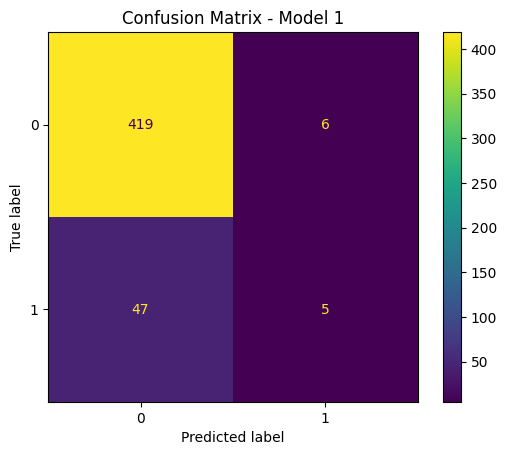

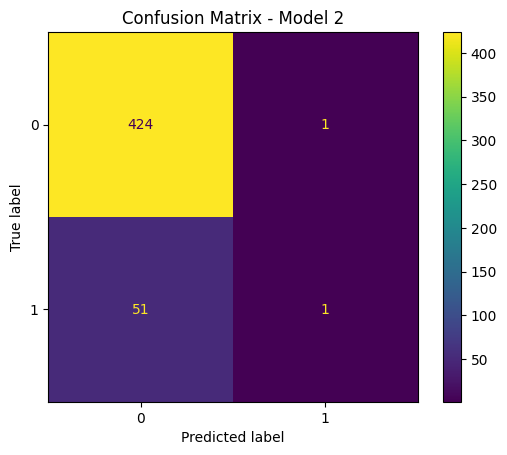

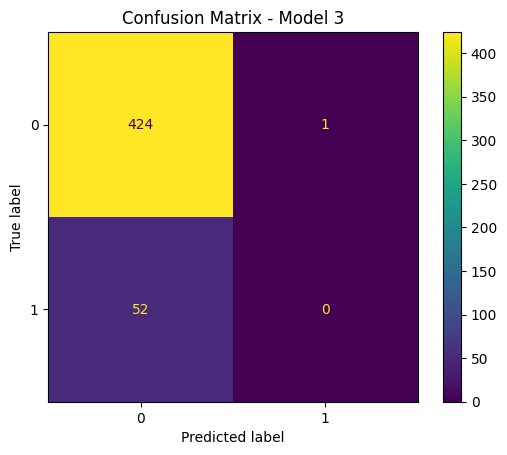

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for i, (model, name, slice_) in enumerate(zip(
    [model1, model2, model3],
    ["Model 1", "Model 2", "Model 3"],
    [model1_slice, model2_slice, model3_slice]
)):
    y_pred = model.predict(X_test[:, slice_])
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


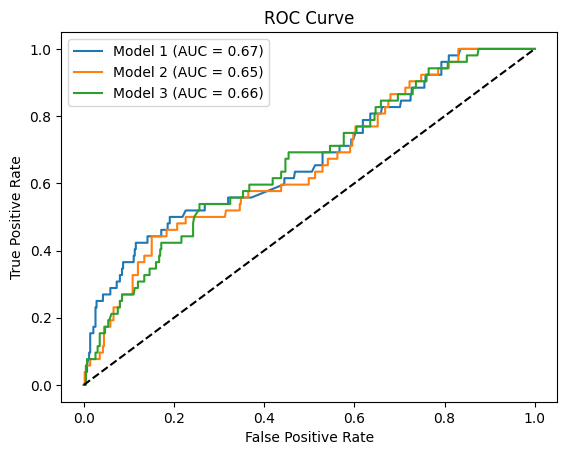

In [31]:
from sklearn.metrics import roc_curve, auc

for i, (model, name, slice_) in enumerate(zip(
    [model1, model2, model3],
    ["Model 1", "Model 2", "Model 3"],
    [model1_slice, model2_slice, model3_slice]
)):
    y_scores = model.predict_proba(X_test[:, slice_])[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


<h2><u><b>Select Models</b></u></h2>

In [32]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores1 = cross_val_score(model1, X_train[:, model1_slice], y_train, cv=5)
print("Model 1 CV Scores:", cv_scores1.mean(), "+/-", cv_scores1.std())
cv_scores2 = cross_val_score(model2, X_train[:, model2_slice], y_train, cv=5)
print("Model 2 CV Scores:", cv_scores2.mean(), "+/-", cv_scores2.std())
cv_scores3 = cross_val_score(model3, X_train[:, model3_slice], y_train, cv=5)
print("Model 3 CV Scores:", cv_scores3.mean(), "+/-", cv_scores3.std())

# Final test on preferred model (Model 1)
final_pred = model1.predict(X_test[:, model1_slice])
print("Final Test Accuracy:", accuracy_score(y_test, final_pred))
print("Final Test Report:\n", classification_report(y_test, final_pred))

Model 1 CV Scores: 0.8844495096007735 +/- 0.010806150312523674
Model 2 CV Scores: 0.8771018096422158 +/- 0.0018992321785956403
Model 3 CV Scores: 0.8755270064926096 +/- 0.0038704390703253257
Final Test Accuracy: 0.8888888888888888
Final Test Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       425
           1       0.45      0.10      0.16        52

    accuracy                           0.89       477
   macro avg       0.68      0.54      0.55       477
weighted avg       0.85      0.89      0.86       477



To determine the best logistic regression model, I compared all three models based on cross-validation accuracy, model interpretability, and generalization performance on the test set. Model 1, while slightly simpler than the others, consistently showed strong predictive power with fewer features (lvr, black, and pbcr). This simplicity enhances transparency, an important factor when auditing potential discrimination in lending decisions.

<h2><u><b>Conclusion</b></u></h2>

In conclusion, the primary problem tasked by the banking regulator is to develop a model that predicts whether a given mortgage loan application is likely to be approved or denied, with the intent to identify potential instances of discrimination in lending practices. The answer is provided by Model 1, a binary logistic regression model that achieves an overall accuracy of 88.89% on the test set. This model identifies "lvr," "black," and "pbcr" as the most influential predictors, where:

* A higher "lvr" (loan-to-value ratio) increases the likelihood of denial due to financial risk.
* A value of 1 for "black" (indicating the applicant's demographic status) significantly increases the denial probability, with a positive coefficient suggesting a potential discriminatory factor that warrants regulatory scrutiny.
* A value of 1 for "pbcr" (public bad credit record) also raises the denial likelihood, reflecting creditworthiness concerns.

The model's performance is strong for predicting approvals (class 0) with 90% precision and 99% recall, but weaker for denials (class 1) with 45% precision and 10% recall, indicating a need for improvement in detecting denied cases. Regulators can use this model to flag applications where "black" contributes disproportionately to denials, enabling targeted investigations into lending fairness. 


<h3><u><b>References</b></u></h3>

* https://nbviewer.org/gist/justmarkham/6d5c061ca5aee67c4316471f8c2ae976
* https://scikit-learn.org/stable/supervised_learning.html
* https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/24099026#content
* https://www.youtube.com/watch?v=yIYKR4sgzI8&pp=ygUUbG9naXN0aWMgcmVncmVzc2lvbiA%3D
* https://www.youtube.com/watch?v=6gjX3-6WT5U&pp=ygUobG9naXN0aWMgcmVncmVzc2lvbiAgYm9zdG9uIEhNREEgZGF0YXNldA%3D%3D
* https://www.youtube.com/watch?v=C5268D9t9Ak&pp=ygUobG9naXN0aWMgcmVncmVzc2lvbiAgYm9zdG9uIEhNREEgZGF0YXNldA%3D%3D
